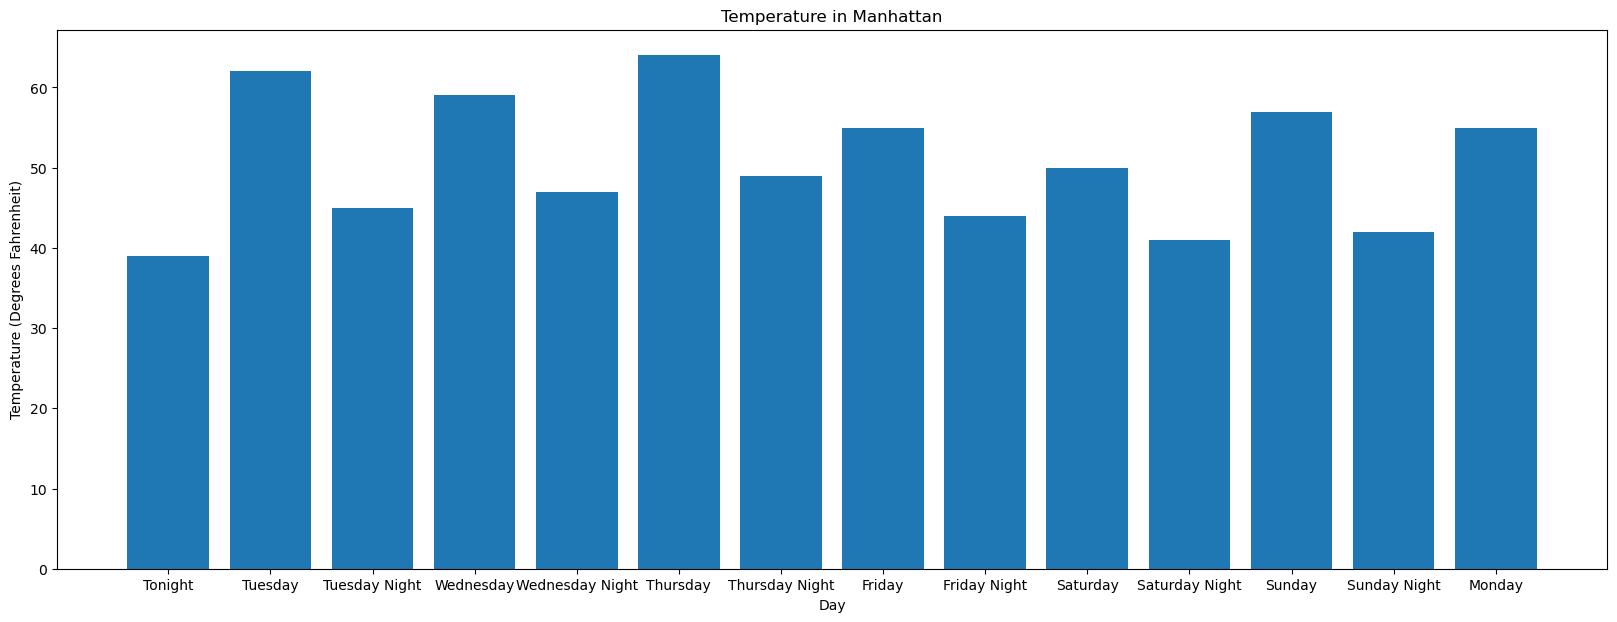

In [30]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

csv_file = open("weather_info_api.csv", "w", newline= "", encoding= "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Day", "Temperature", "Description"])

lat = "40.741895"
lon = "-73.989308"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
# json_file

forecast = json_file['properties']['forecast']
new_request = requests.get(forecast)

json = new_request.json()
# json

weather_list = json['properties']['periods']

for i in range(len(weather_list)):
    day = json['properties']['periods'][i]['name']
    temp = json['properties']['periods'][i]['temperature']
    desc = json['properties']['periods'][i]['detailedForecast']
    csv_writer.writerow([day, temp, desc])
    
sheet = pd.read_csv("weather_info_api.csv")
# csv_file.close()

df = pd.DataFrame(sheet)

graph_day = df["Day"]
graph_temp = df["Temperature"]

# In order to make the days on the graph more visible, I increased the size of the graph in the horizontal direction
fig = plt.figure(figsize = (20, 7))
plt.bar(graph_day[0:14], graph_temp[0:14])

plt.xlabel("Day")
plt.ylabel("Temperature (Degrees Fahrenheit)")
plt.title("Temperature in Manhattan")

plt.show()

In [39]:
# This cell edits the url to obtain info on the United States as shown in the url below, then converts it into a printable json
country_info = requests.get("https://date.nager.at/api/v3/CountryInfo/USA")
country_info_json = country_info.json()
country_info_json


{'commonName': 'United States',
 'officialName': 'United States of America',
 'countryCode': 'US',
 'region': 'Americas',
 'borders': [{'commonName': 'Canada',
   'officialName': 'Canada',
   'countryCode': 'CA',
   'region': 'Americas',
   'borders': None},
  {'commonName': 'Mexico',
   'officialName': 'United Mexican States',
   'countryCode': 'MX',
   'region': 'Americas',
   'borders': None}]}

In [38]:
# The url is edited with "AvailableCountries" to give a dictionary of countries listed on the website
countries = requests.get("https://date.nager.at/api/v3/AvailableCountries")
countries_json = countries.json()
countries_json


[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [43]:
# Using "LongWeekend" and formatting it as a printable json, a list of information containing information on long weekends is given
long_weekend = requests.get("https://date.nager.at/api/v3/LongWeekend/2023/US")
long_weekend_json = long_weekend.json()
long_weekend_json


[{'startDate': '2022-12-31',
  'endDate': '2023-01-02',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-01-14',
  'endDate': '2023-01-16',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-02-18',
  'endDate': '2023-02-20',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-05-27',
  'endDate': '2023-05-29',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-06-17',
  'endDate': '2023-06-19',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-07-01',
  'endDate': '2023-07-04',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-09-02',
  'endDate': '2023-09-04',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-11-10',
  'endDate': '2023-11-12',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-11-23',
  'endDate': '2023-11-26',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-25',
  'dayCount': 3,
  'needBridgeDay': False}]

In [48]:
# Gives a list of information on all of the public holidays in the United States for 2023
public_holidays_year_country = requests.get("https://date.nager.at/api/v3/PublicHolidays/2023/US")
public_holidays_year_country_json = public_holidays_year_country.json()
public_holidays_year_country_json


[{'date': '2023-01-02',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-16',
  'localName': 'Martin Luther King, Jr. Day',
  'name': 'Martin Luther King, Jr. Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-20',
  'localName': 'Presidents Day',
  'name': "Washington's Birthday",
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-

In [53]:
public_holidays_check = requests.get("https://date.nager.at/api/v3/IsTodayPublicHoliday/US")
print(public_holidays_check)


<Response [204]>


In [57]:
# The url is edited to obtain find information on the next public holidays, which is changed to a json and printed
next_public_holiday = requests.get("https://date.nager.at/api/v3/NextPublicHolidays/US")
next_public_holiday_json = next_public_holiday.json()
next_public_holiday_json


[{'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-29',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-06-19',
  'localName': 'Juneteenth',
  'name': 'Juneteenth',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 2021,
  'types': ['Public']},
 {'date': '2023-07-04',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-09-04',
  'localName': 'Labor Day',
  'name'

In [58]:
# This version of the url does not require a country tag in it and contains the next public holiday for the whole world
next_week_holidays = requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
next_week_holidays_json = next_week_holidays.json()
next_week_holidays_json


[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [74]:
codes = ['AU', 'CH', 'DK', 'EG', 'ES', 'GB', 'GR', 'IT', 'JP', 'US']
holidays_dict = {}

for code in codes:
    current_list = []
    current_country = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{code}")
    info_json = current_country.json()
    current_count = 0
    for info in info_json:
        current_list.append(info['name'])
        current_count += 1
#     The idea here was to add the number of holidays at the end of the list for each value in the dictionary
#     I wasn't sure how to do this without making it in a csv though, which I tried to stay away from because of the
#     way that the loop iterated which made it hard to create and organized csv.
#     So in short I would use that value in each list for the dictionary to make the graph, along with the keys in the dictionary
#     current_list.append[current_count]
    holidays_dict[code] = current_list

print(holidays_dict)


{'AU': ["New Year's Day", 'Australia Day', 'Labour Day', 'Canberra Day', 'March Public Holiday', 'Eight Hours Day', 'Labour Day', 'Good Friday', 'Holy Saturday', 'Easter Sunday', 'Easter Monday', 'Anzac Day', 'May Day', 'Labour Day', 'Reconciliation Day', 'Western Australia Day', "Queen's Birthday", 'Picnic Day', 'Labour Day', 'Christmas Day', "St. Stephen's Day"], 'CH': ["New Year's Day", "St. Berchtold's Day", 'Epiphany', "Saint Joseph's Day", 'Good Friday', 'Easter Monday', 'Labour Day', 'Ascension Day', 'Whit Monday', 'Corpus Christi', 'Swiss National Day', 'Assumption of the Virgin Mary', 'Geneva Prayday', 'Federal Day of Thanksgiving', 'Federal Fast Monday', "All Saints' Day", 'Immaculate Conception', 'Christmas Day', "St. Stephen's Day"], 'DK': ["New Year's Day", 'Maundy Thursday', 'Good Friday', 'Easter Sunday', 'Easter Monday', 'General Prayer Day', 'Ascension Day', 'Bank closing day', 'Pentecost', 'Whit Monday', 'Constitution Day', 'Christmas Eve', 'Christmas Day', "St. Steph